# 11. K-Means Clustering: Finding the Centers of Groups

**Course Section:** 11
**Topics:** Unsupervised Learning, Clustering, Centroid-Based Clustering, Vector Quantization, Elbow Method.
**Dataset:** Synthetic `make_blobs` data for clear visualization.

---

## 11.1. The Goal of Clustering 

Clustering is a core task in Unsupervised Learning. The main objective is to group a set of objects in such a way that objects in the same group (called a **cluster**) are more **similar** to each other than to those in other groups. We don't provide the algorithm with any labels; it must discover these groupings on its own.

K-Means is an algorithm that achieves this by finding `k` cluster "centers" or **centroids**.

## 11.2. The K-Means Algorithm: An Iterative Dance 

The algorithm is surprisingly simple and intuitive. It's an iterative process that alternates between two steps:

1.  **Initialization:** First, we must choose `k`, the number of clusters we want to find. The algorithm then randomly selects `k` data points from our dataset to serve as the initial centroids.

2.  **The Dance (Iteration):**
    *   **Assignment Step:** For every data point, calculate its distance to each of the `k` centroids. Assign the data point to the cluster of the *nearest* centroid.
    *   **Update Step:** After assigning all points, recalculate the position of each of the `k` centroids by taking the *mean* of all data points assigned to its cluster. The centroid moves to the center of its new cluster.

3.  **Convergence:** Repeat the "Assignment" and "Update" steps until the centroids no longer move significantly between iterations. At this point, the algorithm has converged, and the final clusters are formed.

---

## 11.3. Implementation with Scikit-Learn (Code)

Let's see this in action on a dataset that is perfect for K-Means: blobs of data.

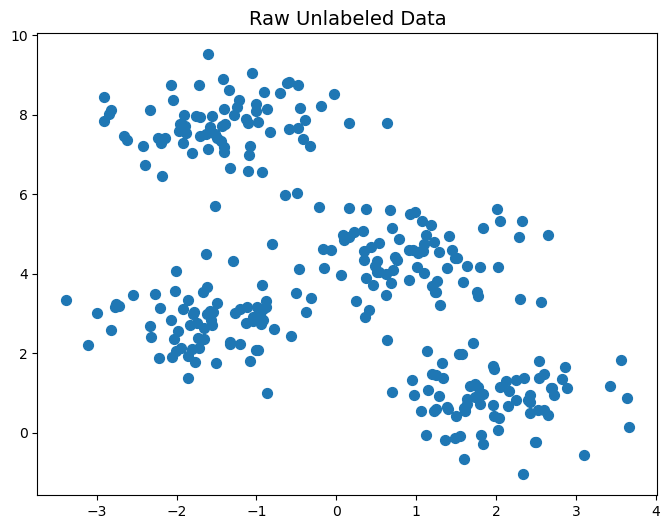

C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


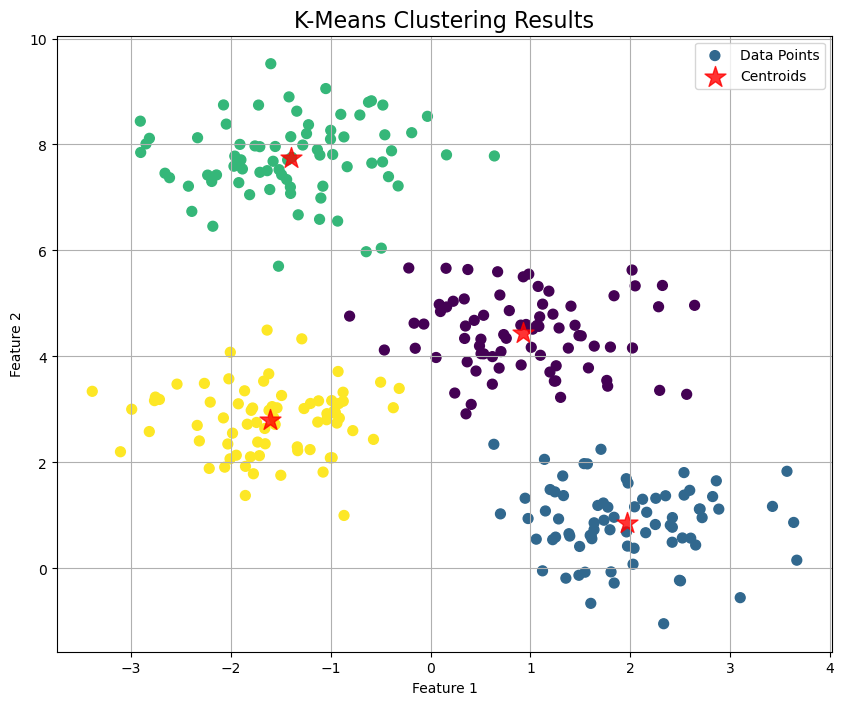

In [6]:
# Step 1: Generate Data and Import Libraries

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 distinct clusters
X, y_true = make_blobs(
n_samples=300, 
centers=4, 
cluster_std=0.70, 
random_state=0
)

# Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Raw Unlabeled Data", fontsize=14)
plt.show()

# Step 2: Create and Fit the K-Means Model

# We tell the model we are looking for 4 clusters (`n_clusters=4`).

# Create a KMeans instance with k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')

# Fit the model to the data
kmeans.fit(X)

#Step 3: Visualize the Results

# We can now see the labels assigned by the algorithm and the final location of the centroids.


# Get the cluster labels for each point
y_kmeans = kmeans.predict(X)

# Get the coordinates of the final centroids
centers = kmeans.cluster_centers_

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.8, marker='*', label='Centroids')

plt.title("K-Means Clustering Results", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 11.4. The Big Question: How to Choose `k`? The Elbow Method 

In our example, we knew there were 4 clusters. But in the real world, we rarely know the optimal `k`. The **Elbow Method** is a popular heuristic to help us find it.

The idea is to run K-Means for a range of `k` values (e.g., 1 to 10) and calculate the **inertia** for each run.
*   **Inertia:** The sum of squared distances of samples to their closest cluster center. It's a measure of how internally coherent the clusters are. A smaller inertia is better.

We then plot inertia vs. `k`. As `k` increases, inertia will always decrease. However, we are looking for the "elbow" point—the point on the graph where the rate of decrease slows down dramatically. This point suggests that adding more clusters is no longer providing significant value.


C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

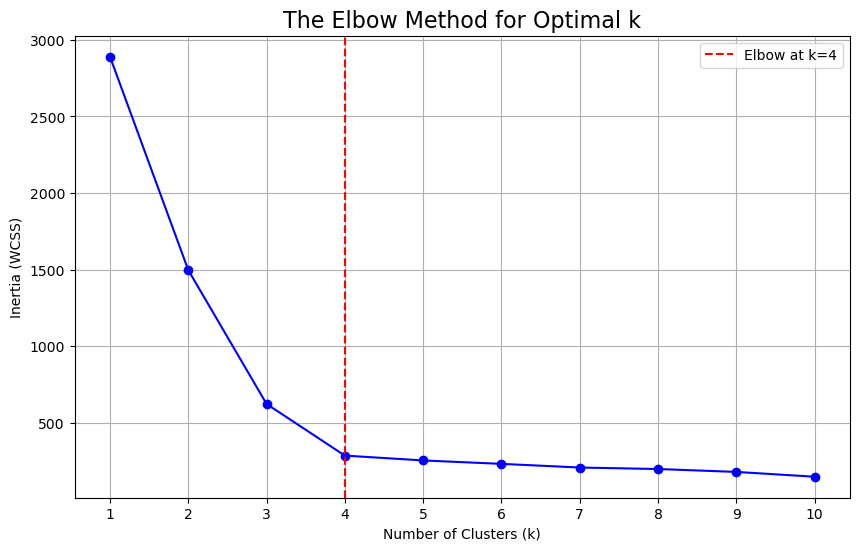

In [11]:

# Calculate inertia for a range of k values
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('The Elbow Method for Optimal k', fontsize=16)
plt.xticks(k_range)
plt.grid(True)
# Highlight the elbow
plt.axvline(x=4, color='red', linestyle='--', label='Elbow at k=4')
plt.legend()
plt.show()

## 11.5. Medical Context & Applications

K-Means is widely used in medical data analysis due to its simplicity and scalability.

1.  **Patient Phenotyping:** This is a classic application. By clustering patients based on clinical data (e.g., lab results, vital signs, genetic markers), K-Means can help identify distinct patient subgroups. For example, a study on diabetes might reveal 3-4 distinct patient profiles, each potentially requiring a different treatment approach.
2.  **Medical Image Segmentation:** K-Means can be used for basic image segmentation. For an MRI scan of the brain, pixels can be clustered based on their intensity values. If we set `k=3`, the algorithm might find clusters corresponding to Cerebrospinal Fluid (CSF), Gray Matter, and White Matter, effectively segmenting the brain into its primary tissue types. This is a form of **vector quantization**.
3.  **Gene Expression Analysis:** In genomics, K-Means can group genes that show similar expression patterns across different conditions or patients. This can help identify genes that are co-regulated or involved in the same biological pathways.

---

## 11.6. Summary
*   **K-Means** is a simple, fast, and powerful centroid-based clustering algorithm.
*   It partitions data into a pre-determined number of clusters, `k`.
*   The algorithm iteratively assigns points to the nearest centroid and then updates the centroid's position.
*   The **Elbow Method** is a common technique used to estimate the optimal value for `k` by plotting cluster inertia.
*   **Limitations:** It assumes clusters are spherical, of similar size, and is sensitive to the initial placement of centroids (though `n_init` helps). It is not suitable for data with complex shapes or varying densities, where DBSCAN would be a better choice.
